In [1]:
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

In [2]:
x, y = make_classification(n_samples=10000, n_classes=2, n_clusters_per_class=1, n_redundant=0, weights=[0.99], random_state=10)

In [3]:
x

array([[ 0.9788705 , -0.25344851, -1.30623097, ...,  1.96819248,
         2.22881128, -0.06736091],
       [ 0.20276926,  0.48473095,  0.94415911, ..., -0.07820068,
         1.03776926, -0.37873389],
       [ 0.24778224, -1.09491297,  0.70979654, ..., -0.29971195,
        -0.16943521,  0.37234719],
       ...,
       [-1.33701471,  0.26011326,  0.10119747, ..., -0.4147124 ,
        -0.53351491,  0.85181505],
       [ 0.7168617 ,  1.26459534,  0.69784612, ..., -0.40314213,
        -0.8587251 ,  0.30025887],
       [-2.42065092, -0.47616121, -1.68623807, ..., -1.15282293,
         0.63882171,  1.38918583]], shape=(10000, 20))

In [4]:
Counter(y)

Counter({np.int64(0): 9841, np.int64(1): 159})

In [5]:
import pandas as pd
import seaborn as sns

<Axes: xlabel='0', ylabel='1'>

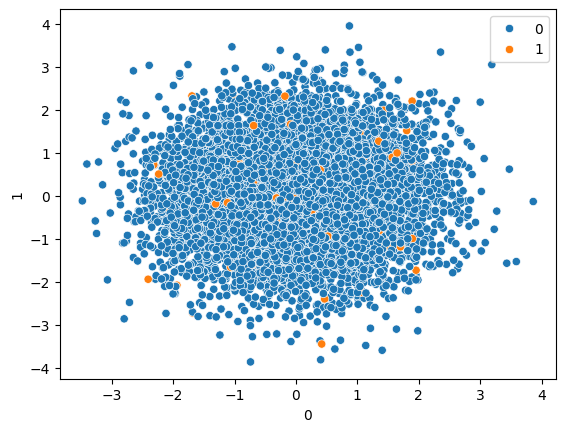

In [6]:
sns.scatterplot(x=pd.DataFrame(x)[0], y=pd.DataFrame(x)[1], hue=y)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [9]:
model = LogisticRegression()

penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight = [{0:w, 1:y} for w in [1, 10, 50, 100] for y in [1, 10, 50, 100]]

In [10]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9868

In [11]:
params = dict(penalty=penalty, C=c_values, solver=solver, class_weight=class_weight)

In [12]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [13]:
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model, cv=cv, param_grid=params, n_jobs=-1, scoring="accuracy")

In [14]:
grid.fit(x_train, y_train)

H:\Python-all-in-one\ML-algorithams\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3200 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "H:\Python-all-in-one\ML-algorithams\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "H:\Python-all-in-one\ML-algorithams\myenv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "H:\Python-all-in-one\ML-algorithams\myenv\Lib\site-pack

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [15]:
y_pred = grid.predict(x_test)

In [16]:
accuracy_score(y_test, y_pred)

0.9868

In [17]:
grid.best_params_

{'C': 0.01, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l1', 'solver': 'saga'}